In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from logistic_regression import *
from z_score import *
from train_test_split import *
from sklearn.metrics import confusion_matrix, accuracy_score

In [9]:
data = pd.read_csv('../breastcancer.csv', header=None)

X = data.iloc[:, :-1].values
y = (data.iloc[:, -1].values).reshape(-1, 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
normalizer = ZScore()

X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm = np.hstack((np.ones((X_train_norm.shape[0], 1)), X_train_norm))
X_test_norm = np.hstack((np.ones((X_test_norm.shape[0], 1)), X_test_norm))

In [12]:
model = LogisticRegression()
model.fit(X_train_norm, y_train)

In [13]:
bce = model.get_bce_loss(X_test_norm, y_test)
print(bce)

[0.05122801]


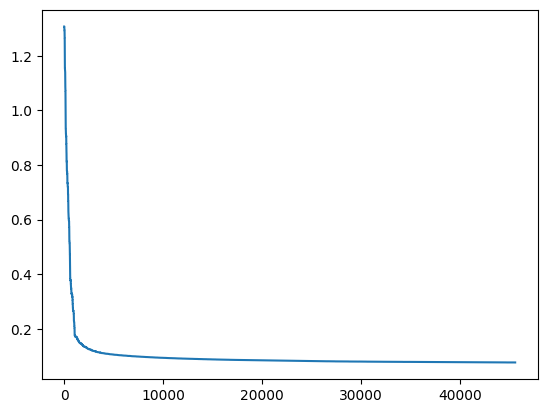

In [14]:
rng = range(len(model.get_log()))

plt.plot(rng, model.get_log())
plt.show()

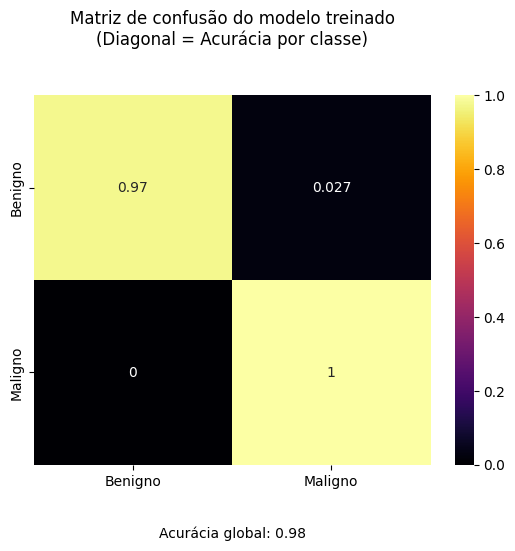

In [59]:
y_pred = model.pred(X_test_norm)
y_pred_where = np.where(y_pred < 0.5, 0, 1)

labels = ['Benigno', 'Maligno']

cm = confusion_matrix(y_test, y_pred_where, normalize='true')
cm_display = sns.heatmap(cm, xticklabels=labels, yticklabels=labels, annot=True, cmap='inferno')
plt.title('Matriz de confusão do modelo treinado\n(Diagonal = Acurácia por classe)\n\n')
plt.xlabel(f'\n\nAcurácia global: {accuracy_score(y_test, y_pred_where):.2f}')
plt.show()